<a href="https://colab.research.google.com/github/Rin-niee/MachineLearning/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Загрузка библиотек и предобработка данных**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,risk_group
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1,0
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0,1
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0,1
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0,1
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0,1


In [ ]:
df['risk_group']= np.where(df['IHD_DX']<=6, 1, 0)
df.risk_group = df.risk_group.astype('category')
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,risk_group
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1,0
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0,1
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0,1
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0,1
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0,1


In [ ]:
df[['AGE_50', 'MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']] = df[['AGE_50', 'MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']].astype({'AGE_50':'category', 'MD_50':'category', 'SES':'category', 'CL_STATUS':'category', 'MD_62':'category', 'IHD_DX':'category', 'DEATH':'category', 'risk_group':'category'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AGE_50      200 non-null    category
 1   MD_50       200 non-null    category
 2   SBP_50      200 non-null    int64   
 3   DBP_50      200 non-null    int64   
 4   HT_50       200 non-null    int64   
 5   WT_50       200 non-null    int64   
 6   CHOL_50     200 non-null    int64   
 7   SES         200 non-null    category
 8   CL_STATUS   200 non-null    category
 9   MD_62       200 non-null    category
 10  SBP_62      200 non-null    int64   
 11  DBP_62      200 non-null    int64   
 12  CHOL_62     200 non-null    int64   
 13  WT_62       200 non-null    int64   
 14  IHD_DX      200 non-null    category
 15  DEATH       200 non-null    category
 16  risk_group  200 non-null    category
dtypes: category(8), int64(9)
memory usage: 18.7 KB


In [ ]:
Y = df['risk_group']
X = df.drop('risk_group', axis =1)
X = X.drop('IHD_DX', axis =1)
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,risk_group
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1,0
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0,1
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0,1
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0,1
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0,1


# **2. Масштабирование признаков**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE_50     200 non-null    category
 1   MD_50      200 non-null    category
 2   SBP_50     200 non-null    int64   
 3   DBP_50     200 non-null    int64   
 4   HT_50      200 non-null    int64   
 5   WT_50      200 non-null    int64   
 6   CHOL_50    200 non-null    int64   
 7   SES        200 non-null    category
 8   CL_STATUS  200 non-null    category
 9   MD_62      200 non-null    category
 10  SBP_62     200 non-null    int64   
 11  DBP_62     200 non-null    int64   
 12  CHOL_62    200 non-null    int64   
 13  WT_62      200 non-null    int64   
 14  DEATH      200 non-null    category
dtypes: category(6), int64(9)
memory usage: 17.8 KB


In [ ]:
X_processed = X.copy()
category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category
# Применяем One-Hot Encoding
#!!!!
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [ ]:
X_processed

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,AGE_50_22,...,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5,DEATH_1
0,110,65,64,147,291,120,78,271,146,False,...,False,False,False,False,True,False,False,True,False,True
1,130,72,69,167,278,122,68,250,165,False,...,False,False,True,False,False,True,False,False,False,True
2,120,90,70,222,342,132,90,304,223,False,...,False,False,False,False,True,False,False,False,False,True
3,120,80,72,229,239,118,68,209,227,False,...,False,False,False,False,True,True,False,False,False,True
4,118,74,66,134,243,118,56,261,138,False,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,115,80,66,148,300,115,65,273,152,False,...,False,False,False,False,True,False,False,False,False,False
196,110,70,69,137,120,112,76,198,153,False,...,False,False,False,False,True,True,False,False,False,False
197,130,80,66,150,210,130,85,274,158,False,...,False,False,False,False,False,False,False,False,False,False
198,140,84,66,138,130,148,88,160,157,False,...,False,False,True,False,False,True,False,False,False,False


In [ ]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию(???)
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [ ]:
X_processed

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,AGE_50_22,...,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5,DEATH_1
0,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,False,...,False,False,False,False,True,False,False,True,False,True
1,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,False,...,False,False,True,False,False,True,False,False,False,True
2,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,False,...,False,False,False,False,True,False,False,False,False,True
3,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,False,...,False,False,False,False,True,True,False,False,False,True
4,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,False,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,False,...,False,False,False,False,True,False,False,False,False,False
196,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,False,...,False,False,False,False,True,True,False,False,False,False
197,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,False,...,False,False,False,False,False,False,False,False,False,False
198,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,False,...,False,False,True,False,False,True,False,False,False,False


# **3. Очистка данных и удаление выбросов**

**Определение функции обучения с оценкой принадлежности к группе риска**

In [ ]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [ ]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9375
Точность на тестовой выборке: 0.9500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

# **Метод 1: удаление на основе медианы**

In [ ]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [ ]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [ ]:
X_processed.describe()

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.300820,0.444902,0.511429,0.434375,0.332783,0.446750,0.417681,0.502489,0.430254
std,0.148481,0.107848,0.197726,0.195879,0.133793,0.154105,0.185625,0.203099,0.199393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180328,0.392157,0.357143,0.279412,0.240964,0.343750,0.289855,0.365721,0.295290
50%,0.262295,0.411765,0.500000,0.411765,0.313253,0.425000,0.391304,0.491266,0.416667
75%,0.344262,0.509804,0.642857,0.588235,0.421687,0.531250,0.492754,0.629913,0.572464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_iqr.describe()

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.294329,0.443177,0.513120,0.432173,0.329371,0.444356,0.416519,0.505213,0.429976
std,0.134120,0.094428,0.199252,0.196737,0.125045,0.151993,0.186385,0.199783,0.201140
min,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.039301,0.000000
25%,0.180328,0.392157,0.357143,0.279412,0.240964,0.342187,0.286232,0.370087,0.288043
50%,0.262295,0.411765,0.535714,0.408088,0.313253,0.425000,0.376812,0.491266,0.416667
75%,0.344262,0.509804,0.642857,0.582721,0.414458,0.531250,0.492754,0.629913,0.572464
max,0.836066,0.754902,1.000000,1.000000,0.768675,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9359
Точность на тестовой выборке: 0.9500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

**Анализ выводов**
Точность совершенно не изменилась, что говорит о малом влиянии выбросов на модель или не присутствует нормальное распределение, данные ассиметричны(?)

# **Метод 2: удаление на основе среднего**

In [ ]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [ ]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [ ]:
X_processed.describe()

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.300820,0.444902,0.511429,0.434375,0.332783,0.446750,0.417681,0.502489,0.430254
std,0.148481,0.107848,0.197726,0.195879,0.133793,0.154105,0.185625,0.203099,0.199393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180328,0.392157,0.357143,0.279412,0.240964,0.343750,0.289855,0.365721,0.295290
50%,0.262295,0.411765,0.500000,0.411765,0.313253,0.425000,0.391304,0.491266,0.416667
75%,0.344262,0.509804,0.642857,0.588235,0.421687,0.531250,0.492754,0.629913,0.572464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_mean.describe()

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.276402,0.431039,0.513120,0.407313,0.323646,0.429592,0.400276,0.494757,0.400375
std,0.113126,0.082907,0.177545,0.168599,0.106148,0.126748,0.167399,0.169764,0.170300
min,0.098361,0.254902,0.142857,0.088235,0.072289,0.187500,0.057971,0.131004,0.036232
25%,0.180328,0.392157,0.428571,0.275735,0.240964,0.337500,0.275362,0.375546,0.282609
50%,0.262295,0.411765,0.571429,0.389706,0.318072,0.406250,0.347826,0.489083,0.398551
75%,0.344262,0.509804,0.642857,0.529412,0.408434,0.500000,0.492754,0.606987,0.514493
max,0.590164,0.656863,0.857143,0.779412,0.585542,0.750000,0.782609,0.868996,0.760870


In [ ]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.9316
Точность на тестовой выборке: 0.9333

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      1.00      0.97        28

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

**Анализ выводов**
В отличие от избавления по медиане, точность модели стала немного ниже, что говорит о меньшем нормальном распределении(?)

# **3. Методы отбора признаков**

**1. Filter методы**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [ ]:
selector.scores_

array([1.17099884e-02, 1.32165914e+00, 1.42334688e+00, 5.64292406e+00,
       1.53510984e+00, 8.69392171e-01, 5.55190050e-02, 9.55232357e-04,
       3.65446386e+00, 6.35294118e-02, 6.35294118e-02, 1.69200000e+01,
       1.92648649e-01, 2.58260870e-01, 1.27741935e-01, 1.92648649e-01,
       4.59447514e-01, 1.27741935e-01, 4.07639927e+00, 6.19953682e-01,
       2.58260870e-01, 3.24590164e-01, 1.92648649e-01, 4.07639927e+00,
       1.92648649e-01, 1.92648649e-01, 1.92648649e-01, 5.28000000e-01,
       3.91648352e-01, 3.91648352e-01, 5.28000000e-01, 5.28000000e-01,
       4.33086624e-01, 5.97318436e-01, 6.19953682e-01, 3.91648352e-01,
       6.70674627e+00, 3.24590164e-01, 4.45113689e+00, 2.58260870e-01,
       3.24590164e-01, 1.92648649e-01, 2.96074766e-01, 1.92648649e-01,
       1.92648649e-01, 2.58260870e-01, 2.58260870e-01, 1.92648649e-01,
       2.58260870e-01, 2.62064161e+00, 1.27741935e-01, 6.35294118e-02,
       6.35294118e-02, 2.07163423e+00, 1.45237822e+00, 2.07900000e+00,
      

In [ ]:
X_processed.columns

Index(['SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62', 'DBP_62',
       'CHOL_62', 'WT_62', 'AGE_50_22', 'AGE_50_23', 'AGE_50_24', 'AGE_50_25',
       'AGE_50_26', 'AGE_50_28', 'AGE_50_29', 'AGE_50_30', 'AGE_50_32',
       'AGE_50_33', 'AGE_50_34', 'AGE_50_35', 'AGE_50_36', 'AGE_50_37',
       'AGE_50_38', 'AGE_50_39', 'AGE_50_40', 'AGE_50_41', 'AGE_50_42',
       'AGE_50_43', 'AGE_50_44', 'AGE_50_45', 'AGE_50_46', 'AGE_50_47',
       'AGE_50_48', 'AGE_50_49', 'AGE_50_50', 'AGE_50_51', 'AGE_50_52',
       'AGE_50_53', 'AGE_50_54', 'AGE_50_55', 'AGE_50_56', 'AGE_50_57',
       'AGE_50_58', 'AGE_50_59', 'AGE_50_60', 'AGE_50_61', 'AGE_50_62',
       'AGE_50_63', 'AGE_50_64', 'AGE_50_65', 'AGE_50_68', 'AGE_50_69',
       'MD_50_2', 'MD_50_3', 'MD_50_4', 'SES_2', 'SES_3', 'SES_4', 'SES_5',
       'CL_STATUS_3', 'CL_STATUS_4', 'CL_STATUS_5', 'CL_STATUS_6',
       'CL_STATUS_7', 'CL_STATUS_8', 'MD_62_2', 'MD_62_3', 'MD_62_4',
       'MD_62_5', 'DEATH_1'],
      dtype='object')

In [ ]:
X_processed

,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,AGE_50_22,...,CL_STATUS_4,CL_STATUS_5,CL_STATUS_6,CL_STATUS_7,CL_STATUS_8,MD_62_2,MD_62_3,MD_62_4,MD_62_5,DEATH_1
0,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,False,...,False,False,False,False,True,False,False,True,False,True
1,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,False,...,False,False,True,False,False,True,False,False,False,True
2,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,False,...,False,False,False,False,True,False,False,False,False,True
3,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,False,...,False,False,False,False,True,True,False,False,False,True
4,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,False,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,False,...,False,False,False,False,True,False,False,False,False,False
196,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,False,...,False,False,False,False,True,True,False,False,False,False
197,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,False,...,False,False,False,False,False,False,False,False,False,False
198,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,False,...,False,False,True,False,False,True,False,False,False,False


***!!!Допзадание***
⏰ Изучите 1 из методов и используйте его как score_func (Важно учитывать, что не все методы могут подходить под тип признака, например chi2 подходит только для категориальных)

In [ ]:
selector.get_support(indices=True)

array([ 3, 11, 36, 38, 67])

In [ ]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['WT_50', 'AGE_50_24', 'AGE_50_51', 'AGE_50_53', 'MD_62_3'], dtype='object')


In [ ]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9375
Точность на тестовой выборке: 0.9500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

***2. Wrapper методы***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['WT_50', 'AGE_50_51', 'MD_50_4', 'SES_2', 'MD_62_3'], dtype='object')


In [ ]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)


Точность на обучающей выборке: 0.9375
Точность на тестовой выборке: 0.9500

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.97        38

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***3. Embedded методы***

Коэффициенты модели без регуляризации: [[ 0.21689612 -0.1333449  -0.39350027 -0.8529712  -0.39302234 -0.30996634
   0.07053744  0.17710831 -0.50368771  0.03588383  0.06572246 -0.8062994
   0.16579549  0.08729812  0.11595387  0.22817464  0.23384369  0.0693391
  -0.63384733 -0.21862566  0.21922817  0.33028356  0.1195658  -0.62531379
   0.16823412  0.12395071  0.09498987  0.21954539  0.27880673  0.22316697
   0.38435744  0.36558052 -0.29796579  0.25037191 -0.45081315  0.31242505
  -0.85074636  0.16682287 -0.8507703   0.27136703  0.13231344  0.13194765
  -0.47119382  0.17789951  0.0585924   0.16465308  0.18677521  0.0477908
   0.16009819 -0.58784872  0.07154201  0.04299961  0.01372239  0.72928343
  -0.19747179  0.80841002  0.95019468  0.30652467  0.38274957  0.39498882
   0.34182894  0.11186621  0.02249725 -0.42525222 -0.44291534  0.31759247
  -0.39503285  1.09130361 -0.51088032  0.27239925  0.57493608]]
Коэффициенты модели с регуляризацией: [[ 0.          0.          0.          0.       

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


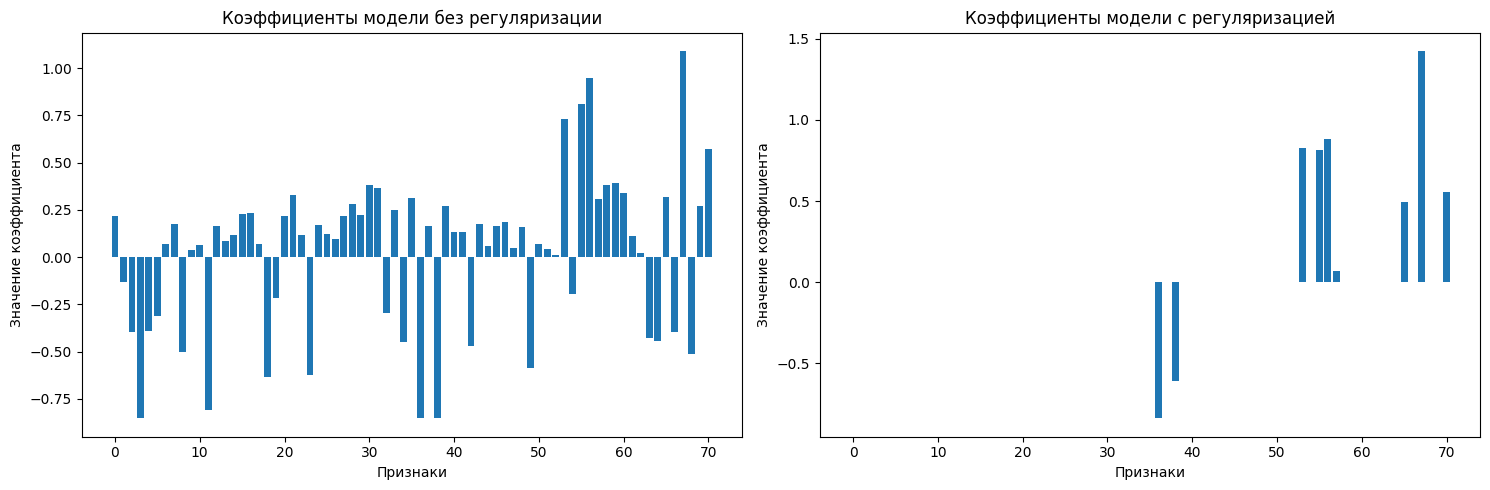

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

***!!! Допзадание***
### ⏰ **Проэксперементировать с разным количеством k, найти лучшую модель, объяснить результат**

### ⏰ **Изучить метод отбора ```SequentialFeatureSelector```, описать способ работы, сравнить результат с прошлыми методами и объяснить полученный результат**

## 4. Логистическая регрессия

In [ ]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [ ]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)



regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


## 5: Кросс-валидация

In [ ]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [ ]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


K-Fold Cross-Validation - Средняя точность: 0.9399999999999998
Точности по каждому фолду: [0.9, 0.975, 0.925, 0.925, 0.975]


***!!! Допзадание***
### ⏰ **Используем результат отбора признаков (выбираем по наилучшей точности), делаем кросс валидацию и объясняем результат + перебираем параметры n_splits**

In [ ]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())


ShuffleSplit Cross-Validation - Средняя точность: 0.9225
Точности по каждому разделению: [0.9125, 0.95, 0.9125, 0.9, 0.9375]


***!!! Допзадание***
### ⏰ **Используем результат отсечения выбросов, делаем кросс валидацию и объясняем результат + перебираем параметры n_splits**

In [ ]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())


Точность на валидационных данных: 0.9
Точность на тестовых данных: 0.96875


***!!!Допзадание***
### ⏰ **Используем результат отсечения выбросов или лучший отбор признаков, делаем кросс валидацию и объясняем результат + перебираем параметры n_splits**

!!!Допзадание
### ⏰ **Объяснить, какой из методов подходит для вашего датасета**